In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
dfM=pd.read_csv('Datos_limpios_Mexico.csv')
dfM=dfM.drop('Unnamed: 0', axis=1)
dfM.head(5)

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,71%,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,100%,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11


In [3]:
dfM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    26582 non-null  object 
 1   source                          26582 non-null  object 
 2   name                            26582 non-null  object 
 3   description                     26582 non-null  object 
 4   host_name                       26582 non-null  object 
 5   host_since                      26582 non-null  object 
 6   host_location                   26582 non-null  object 
 7   host_about                      26582 non-null  object 
 8   host_response_time              26582 non-null  object 
 9   host_response_rate              26582 non-null  object 
 10  host_acceptance_rate            26582 non-null  object 
 11  host_is_superhost               26582 non-null  object 
 12  host_verifications              

In [4]:
from turtle import color

In [5]:
# Filtrar por tipo de habitación en Brasil
dfM_private = dfM[dfM["room_type"] == "Private room"]
dfM_entire = dfM[dfM["room_type"] == "Entire home/apt"]
dfM_shared = dfM[dfM["room_type"] == "Shared room"]
dfM_hotel = dfM[dfM["room_type"] == "Hotel room"]

#Verificar la cantidad de registros en cada DataFrame
print("Private room:", len(dfM_private))
print("Entire home/apt:", len(dfM_entire))
print("Shared room:", len(dfM_shared))
print("Hotel room:", len(dfM_hotel))

Private room: 8693
Entire home/apt: 17363
Shared room: 401
Hotel room: 125


<Axes: xlabel='room_type', ylabel='price'>

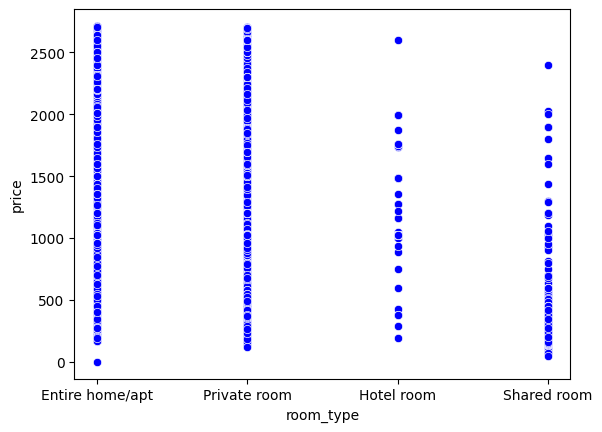

In [6]:
sns.scatterplot(x='room_type', y='price', color='blue', data=dfM)

In [7]:
dfM['host_response_rate'] = dfM['host_response_rate'].str.replace('%', '').astype(float) / 100
dfM['host_acceptance_rate'] = dfM['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
dfM['host_is_superhost'] = dfM['host_is_superhost'].map({'t': True, 'f': False})


# Verificar la conversión
dfM[['host_response_rate', 'host_acceptance_rate']].head()

,host_response_rate,host_acceptance_rate
0,0.00,0.89
1,1.00,0.93
2,0.71,0.57
3,1.00,1.00
4,1.00,1.00


In [8]:
dfM['host_is_superhost'] = dfM['host_is_superhost'].astype(int)

# Verificar la conversión
print(dfM['host_is_superhost'].unique())

[0 1]


In [9]:
print(dfM['review_scores_cleanliness'].unique())

[4.8  4.7  4.75 4.96 5.   4.84 4.61 4.95 4.92 4.97 4.82 4.62 4.73 4.64
 4.58 4.81 4.66 4.89 4.9  4.69 4.86 4.88 4.85 4.65 4.83 4.76 4.94 4.93
 4.74 4.79 4.63 4.5  4.72 4.68 4.98 4.91 4.57 4.55 4.71 4.67 4.78 4.53
 4.51 4.87 4.56 4.77 4.59 4.54 4.44 4.52 4.47 4.49 4.99 4.6  4.43 4.45
 4.48 4.46]


In [10]:
df_encoded = pd.get_dummies(dfM, columns=['property_type', 'room_type', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'], drop_first=True)

# Verificar el resultado
df_encoded.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0.00,...,False,False,False,False,False,False,False,True,True,False
1,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,1.00,...,False,False,False,False,False,False,True,True,True,False
2,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,0.71,...,False,False,False,False,False,False,True,True,True,False
3,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,1.00,...,False,False,False,False,False,False,True,True,True,False
4,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,1.00,...,False,False,False,False,False,False,True,True,True,False


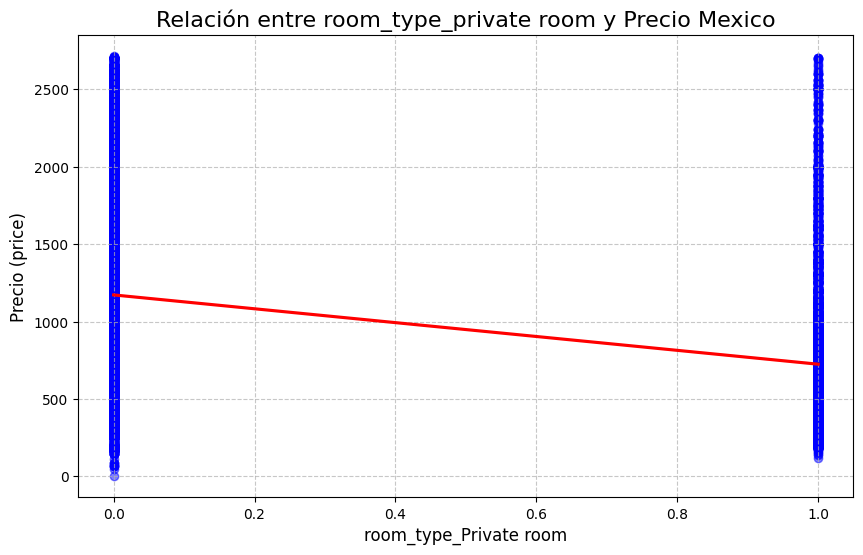

In [11]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio Mexico', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [12]:
df_encoded

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0.00,...,False,False,False,False,False,False,False,True,True,False
1,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,1.00,...,False,False,False,False,False,False,True,True,True,False
2,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,0.71,...,False,False,False,False,False,False,True,True,True,False
3,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,1.00,...,False,False,False,False,False,False,True,True,True,False
4,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,1.00,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/2016,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,1.00,...,False,False,False,False,True,False,True,True,True,True
26578,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,1.00,...,False,False,False,False,True,False,False,True,True,True
26579,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,1.00,...,False,False,False,False,True,False,False,True,True,True
26580,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,1.00,...,False,False,False,False,True,False,False,True,True,True


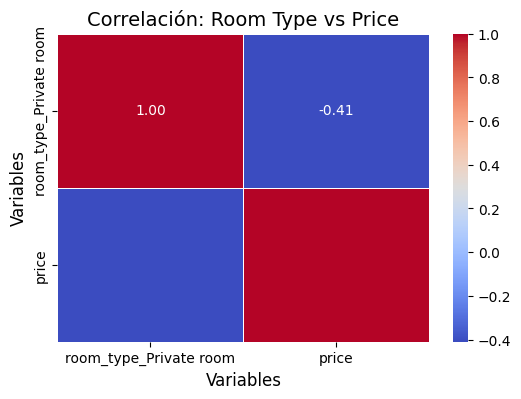

In [97]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['room_type_Private room', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Room Type vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Mostrar el gráfico
plt.show()

ROOM TYPE VS PRICE

In [13]:
x_room = df_encoded[['room_type_Private room']]  # Columnas codificadas de room_type
y_room = df_encoded['price']  # Variable dependiente

In [14]:
from sklearn.model_selection import train_test_split

# Dividir los datos en 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x_room, y_room, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model_room = LinearRegression()

# Entrenar el modelo
model_room.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred_room = model_room.predict(x_test)
y_pred_room

array([1172.38358722, 1172.38358722,  723.74537037, ..., 1172.38358722,
       1172.38358722,  723.74537037])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred_room)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred_room)
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 220672.1197304484
Coeficiente de Determinación (R²): 0.16074530188432834


In [18]:
# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': x_room.columns,
    'Coeficiente': model_room.coef_
})
print(coeficientes)

# Intercepto
print(f'Intercepto: {model_room.intercept_}')

                 Variable  Coeficiente
0  room_type_Private room  -448.638217
Intercepto: 1172.3835872236034


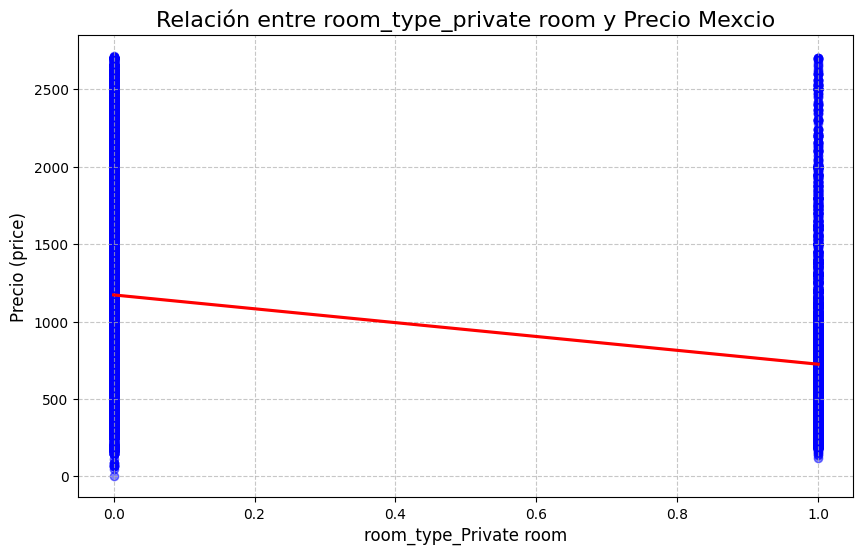

In [19]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio Mexcio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

PRICE VS HOST_ACCEPTANCE RATE

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

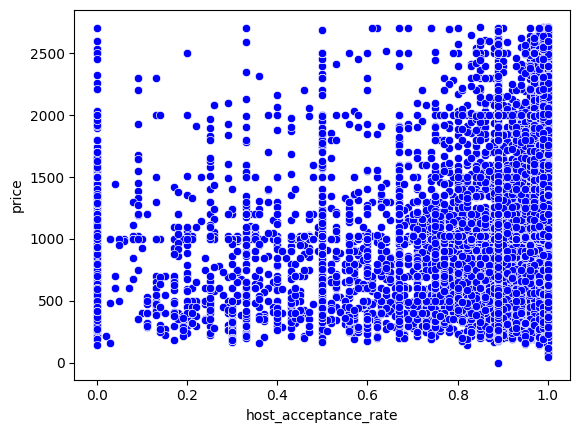

In [20]:
from turtle import color   
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)

In [21]:
Vars_Indep=dfM[['host_acceptance_rate']]
Vars_Dep=dfM['price']

In [22]:
from sklearn.linear_model import LinearRegression
model_rate=LinearRegression()

In [23]:
type(model_rate)

sklearn.linear_model._base.LinearRegression

In [24]:
model_rate.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [25]:
model_rate.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([321.53328889]),
 'rank_': 1,
 'singular_': array([36.25703271]),
 'intercept_': 738.7292528517687}

In [26]:
y_pred_rate=model_rate.predict(X=df_encoded[['host_acceptance_rate']])
y_pred_rate

array([1024.89387996, 1037.75521152,  922.00322752, ..., 1060.26254174,
       1060.26254174, 1060.26254174])

In [27]:
df_encoded.insert(0,'y_pred_rate',y_pred_rate)
df_encoded

,y_pred_rate,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1024.893880,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,...,False,False,False,False,False,False,False,True,True,False
1,1037.755212,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,...,False,False,False,False,False,False,True,True,True,False
2,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,...,False,False,False,False,False,False,True,True,True,False
3,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,...,False,False,False,False,False,False,True,True,True,False
4,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/2016,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,...,False,False,False,False,True,False,True,True,True,True
26578,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,...,False,False,False,False,True,False,False,True,True,True
26579,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,...,False,False,False,False,True,False,False,True,True,True
26580,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

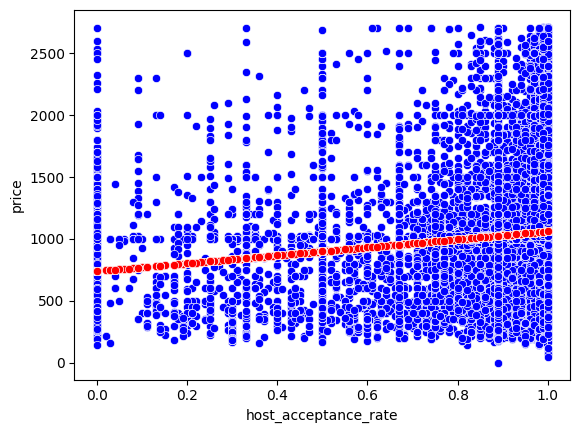

In [28]:
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_acceptance_rate',y='y_pred_rate',color='red',data=df_encoded)

In [83]:
from sklearn.metrics import r2_score
r2 = r2_score(dfM['price'], y_pred_rate)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0194


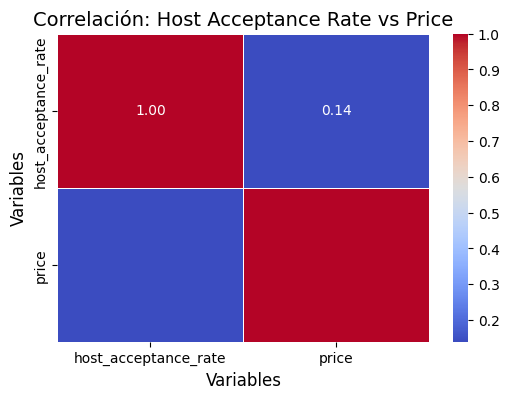

In [98]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['host_acceptance_rate', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Host Acceptance Rate vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Mostrar el gráfico
plt.show()

PRICE VS HOST IS SUPERHOST

<Axes: xlabel='host_is_superhost_1', ylabel='price'>

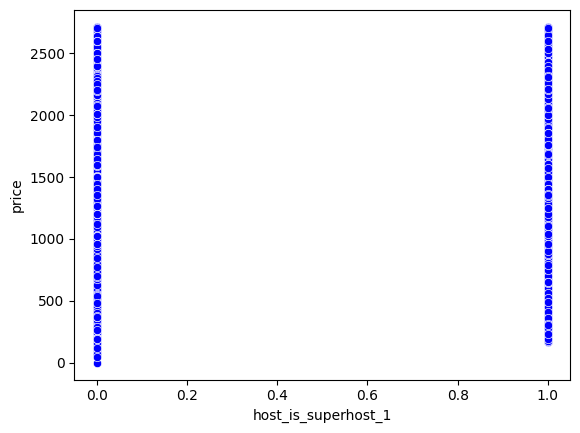

In [29]:
sns.scatterplot(x='host_is_superhost_1',y='price',color='blue',data=df_encoded)

In [30]:
Vars_Indep=df_encoded[['host_is_superhost_1']]
Vars_Dep=dfM['price']

In [31]:
model_super=LinearRegression()

In [32]:
type(model_super)

sklearn.linear_model._base.LinearRegression

In [33]:
model_super.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [34]:
model_super.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost_1'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([102.82096035]),
 'rank_': 1,
 'singular_': array([78.53441437]),
 'intercept_': 988.6764283595337}

In [35]:
y_pred_super=model_super.predict(X=df_encoded[['host_is_superhost_1']])
y_pred_super

array([ 988.67642836, 1091.49738871, 1091.49738871, ...,  988.67642836,
        988.67642836, 1091.49738871])

In [36]:
df_encoded.insert(0,'y_pred_super',y_pred_super)
df_encoded

,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,host_since,host_location,host_about,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,988.676428,1024.893880,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",...,False,False,False,False,False,False,False,True,True,False
1,1091.497389,1037.755212,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,...,False,False,False,False,False,False,True,True,True,False
2,1091.497389,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",...,False,False,False,False,False,False,True,True,True,False
3,1091.497389,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",...,False,False,False,False,False,False,True,True,True,False
4,1091.497389,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1091.497389,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/2016,"Mexico City, Mexico","I am a social person, who likes to provide the...",...,False,False,False,False,True,False,True,True,True,True
26578,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",...,False,False,False,False,True,False,False,True,True,True
26579,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",...,False,False,False,False,True,False,False,True,True,True
26580,988.676428,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='host_is_superhost_1', ylabel='price'>

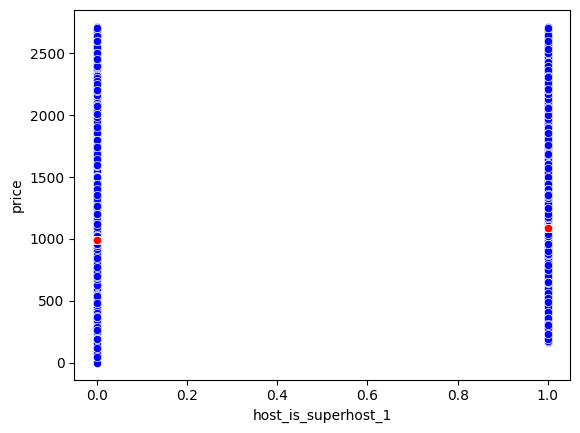

In [37]:
sns.scatterplot(x='host_is_superhost_1',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_is_superhost_1',y='y_pred_super',color='red',data=df_encoded)

In [84]:
r2 = r2_score(dfM['price'], y_pred_super)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0093


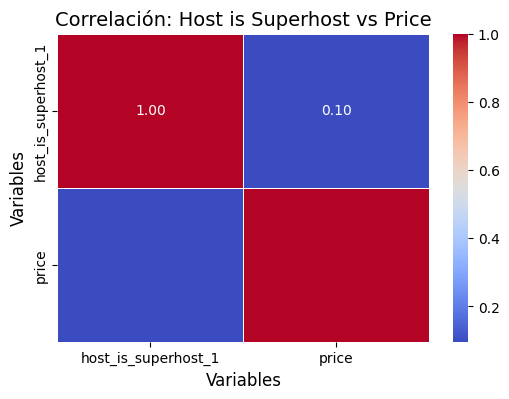

In [99]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['host_is_superhost_1', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Host is Superhost vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


ACCOMMODATES VS BATHROOMS

<Axes: xlabel='accommodates', ylabel='bedrooms'>

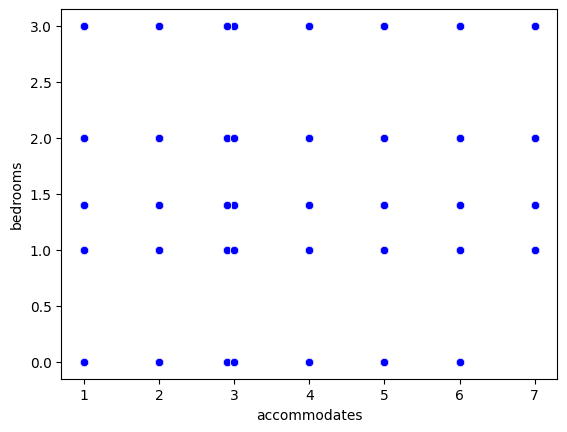

In [38]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)

In [39]:
Vars_Indep=df_encoded[['bedrooms']]
Vars_Dep=df_encoded['accommodates']

In [40]:
from sklearn.linear_model import LinearRegression
model_bedrooms=LinearRegression()

In [41]:
model_bedrooms.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [42]:
type(model_bedrooms)

sklearn.linear_model._base.LinearRegression

In [43]:
model_bedrooms.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.52238047]),
 'rank_': 1,
 'singular_': array([104.90789489]),
 'intercept_': 0.795102178603325}

In [44]:
y_pred_bedrooms=model_bedrooms.predict(X=df_encoded[['bedrooms']])
y_pred_bedrooms

array([2.31748264, 2.92643483, 3.83986311, ..., 2.31748264, 2.31748264,
       2.31748264])

In [45]:
df_encoded.insert(0,'y_pred_bedrooms',y_pred_bedrooms)
df_encoded

,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,host_since,host_location,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,2.317483,988.676428,1024.893880,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico",...,False,False,False,False,False,False,False,True,True,False
1,2.926435,1091.497389,1037.755212,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",...,False,False,False,False,False,False,True,True,True,False
2,3.839863,1091.497389,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico",...,False,False,False,False,False,False,True,True,True,False
3,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico",...,False,False,False,False,False,False,True,True,True,False
4,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,3.839863,1091.497389,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/2016,"Mexico City, Mexico",...,False,False,False,False,True,False,True,True,True,True
26578,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/2024,"Mexico City, Mexico",...,False,False,False,False,True,False,False,True,True,True
26579,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/2024,"Mexico City, Mexico",...,False,False,False,False,True,False,False,True,True,True
26580,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/2024,"Mexico City, Mexico",...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='accommodates', ylabel='bedrooms'>

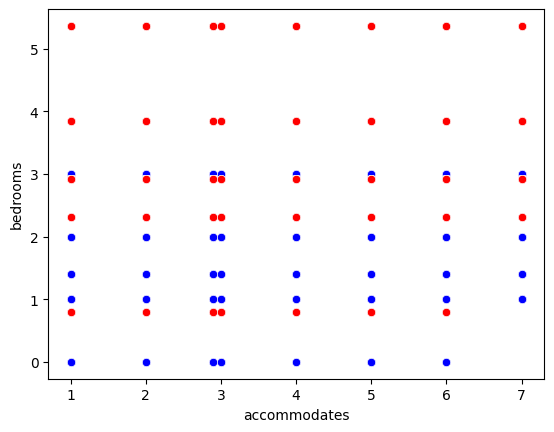

In [46]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)
sns.scatterplot(x='accommodates',y='y_pred_bedrooms',color='red',data=df_encoded)

In [85]:
r2 = r2_score(dfM['price'], y_pred_bedrooms)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: -3.9780


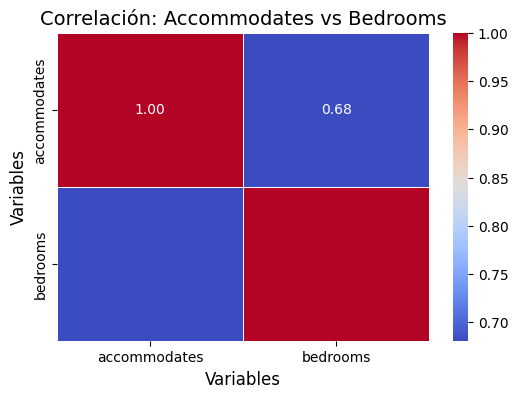

In [100]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['accommodates', 'bedrooms']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Accommodates vs Bedrooms", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()

PRICE VS REVIEW SCORES CLEANLINESS

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

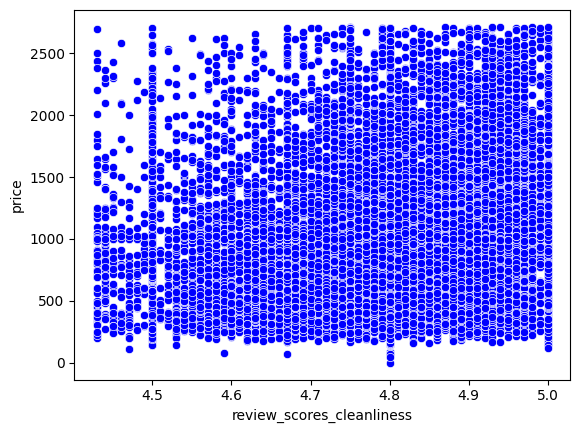

In [47]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)

In [48]:
Vars_Indep=df_encoded[['review_scores_cleanliness']]
Vars_Dep=df_encoded['price']

In [49]:
model_clean=LinearRegression()

In [50]:
type(model_clean)

sklearn.linear_model._base.LinearRegression

In [51]:
model_clean.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [52]:
model_clean.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([401.34423133]),
 'rank_': 1,
 'singular_': array([21.51826955]),
 'intercept_': -913.8247081266684}

In [53]:
y_pred_clean=model_clean.predict(X=df_encoded[['review_scores_cleanliness']])
y_pred_clean

array([1012.62760228,  972.49317915,  992.56039071, ..., 1012.62760228,
       1012.62760228, 1012.62760228])

In [54]:
df_encoded.insert(0,'y_pred_clean',y_pred_clean)
df_encoded

,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,host_since,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1012.627602,2.317483,988.676428,1024.893880,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,...,False,False,False,False,False,False,False,True,True,False
1,972.493179,2.926435,1091.497389,1037.755212,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,...,False,False,False,False,False,False,True,True,True,False
2,992.560391,3.839863,1091.497389,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,...,False,False,False,False,False,False,True,True,True,False
3,1076.842679,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,...,False,False,False,False,False,False,True,True,True,False
4,1092.896449,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1012.627602,3.839863,1091.497389,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/2016,...,False,False,False,False,True,False,True,True,True,True
26578,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/2024,...,False,False,False,False,True,False,False,True,True,True
26579,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/2024,...,False,False,False,False,True,False,False,True,True,True
26580,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/2024,...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

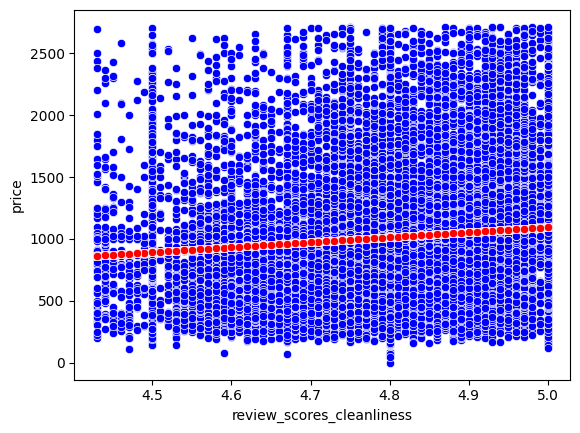

In [55]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='review_scores_cleanliness',y='y_pred_clean',color='red',data=df_encoded)

In [86]:
r2 = r2_score(dfM['price'], y_pred_clean)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0107


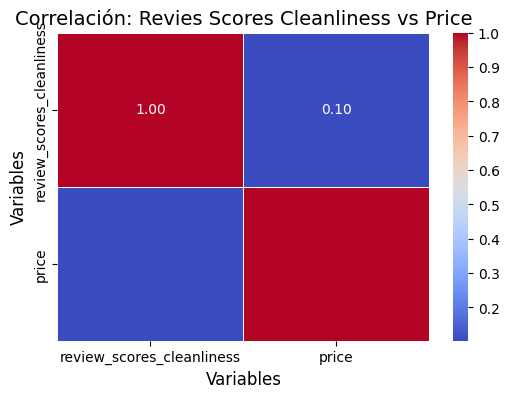

In [101]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['review_scores_cleanliness', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Revies Scores Cleanliness vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


PRICE VS HOST IDENTITY VERIFIED

<Axes: xlabel='host_identity_verified_t', ylabel='price'>

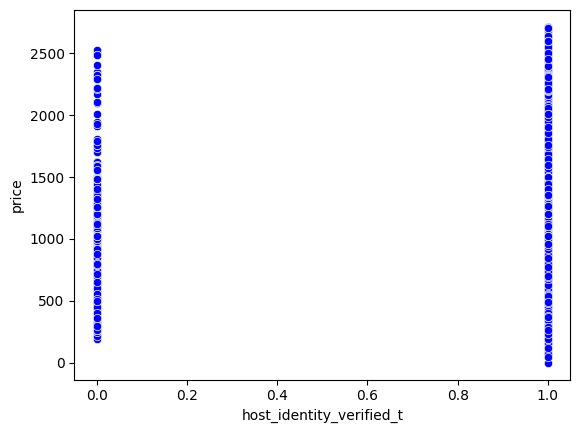

In [56]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)

In [57]:
Vars_Indep=df_encoded[['host_identity_verified_t']]
Vars_Dep=df_encoded['price']

In [58]:
model_verified=LinearRegression()

In [59]:
type(model_verified)

sklearn.linear_model._base.LinearRegression

In [60]:
model_verified.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [61]:
model_verified.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified_t'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([48.49682923]),
 'rank_': 1,
 'singular_': array([33.25248541]),
 'intercept_': 979.9133217993087}

In [62]:
y_pred_verified=model_verified.predict(X=df_encoded[['host_identity_verified_t']])
y_pred_verified

array([1028.41015103, 1028.41015103, 1028.41015103, ..., 1028.41015103,
       1028.41015103, 1028.41015103])

In [63]:
df_encoded.insert(0,'y_pred_verified',y_pred_verified)
df_encoded

,y_pred_verified,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1028.410151,1012.627602,2.317483,988.676428,1024.893880,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,...,False,False,False,False,False,False,False,True,True,False
1,1028.410151,972.493179,2.926435,1091.497389,1037.755212,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,...,False,False,False,False,False,False,True,True,True,False
2,1028.410151,992.560391,3.839863,1091.497389,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,...,False,False,False,False,False,False,True,True,True,False
3,1028.410151,1076.842679,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,...,False,False,False,False,False,False,True,True,True,False
4,1028.410151,1092.896449,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1028.410151,1012.627602,3.839863,1091.497389,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,...,False,False,False,False,True,False,True,True,True,True
26578,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,...,False,False,False,False,True,False,False,True,True,True
26579,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,...,False,False,False,False,True,False,False,True,True,True
26580,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='host_identity_verified_t', ylabel='price'>

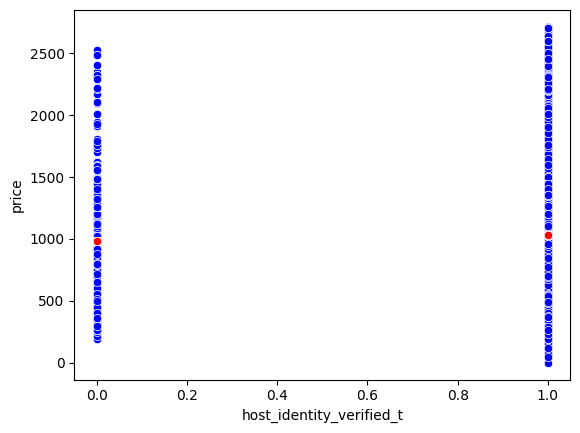

In [64]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_identity_verified_t',y='y_pred_verified',color='red',data=df_encoded)

In [87]:
r2 = r2_score(dfM['price'], y_pred_verified)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0004


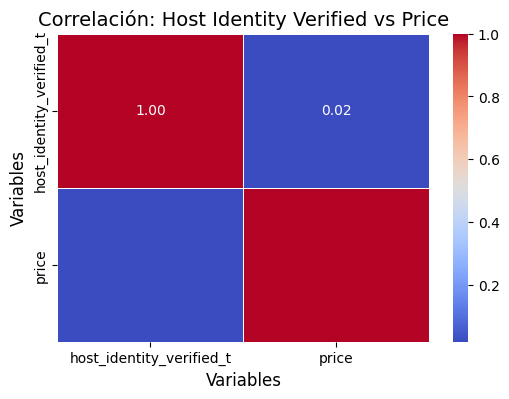

In [102]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['host_identity_verified_t', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Host Identity Verified vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()

PRICE VS INSTANT_BOOKBLE

<Axes: xlabel='instant_bookable_t', ylabel='price'>

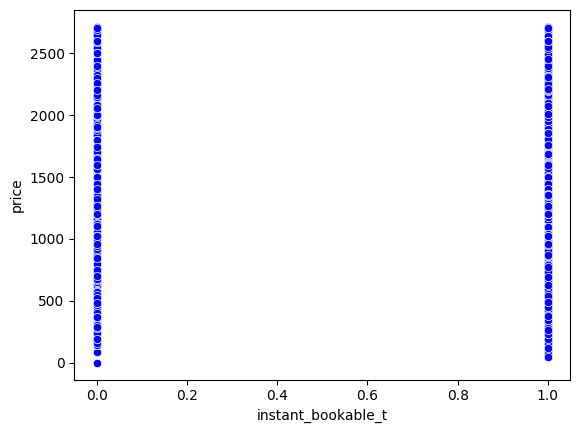

In [65]:
sns.scatterplot(x='instant_bookable_t',y='price',color='blue',data=df_encoded)

In [66]:
Vars_Indep=df_encoded[['instant_bookable_t']]
Vars_Dep=df_encoded['price']

In [67]:
model_bookable=LinearRegression()

In [68]:
type(model_bookable)

sklearn.linear_model._base.LinearRegression

In [69]:
model_bookable.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [70]:
model_bookable.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable_t'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([133.92466891]),
 'rank_': 1,
 'singular_': array([79.70493324]),
 'intercept_': 973.3902425373072}

In [71]:
y_pred_bookable=model_bookable.predict(X=df_encoded[['instant_bookable_t']])
y_pred_bookable

array([ 973.39024254,  973.39024254,  973.39024254, ..., 1107.31491145,
       1107.31491145, 1107.31491145])

In [72]:
df_encoded.insert(0,'y_pred_bookable',y_pred_bookable )
df_encoded

,y_pred_bookable,y_pred_verified,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,973.390243,1028.410151,1012.627602,2.317483,988.676428,1024.893880,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",...,False,False,False,False,False,False,False,True,True,False
1,973.390243,1028.410151,972.493179,2.926435,1091.497389,1037.755212,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,...,False,False,False,False,False,False,True,True,True,False
2,973.390243,1028.410151,992.560391,3.839863,1091.497389,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",...,False,False,False,False,False,False,True,True,True,False
3,973.390243,1028.410151,1076.842679,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,...,False,False,False,False,False,False,True,True,True,False
4,973.390243,1028.410151,1092.896449,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1107.314911,1028.410151,1012.627602,3.839863,1091.497389,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,...,False,False,False,False,True,False,True,True,True,True
26578,1107.314911,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,...,False,False,False,False,True,False,False,True,True,True
26579,1107.314911,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,...,False,False,False,False,True,False,False,True,True,True
26580,1107.314911,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='instant_bookable_t', ylabel='price'>

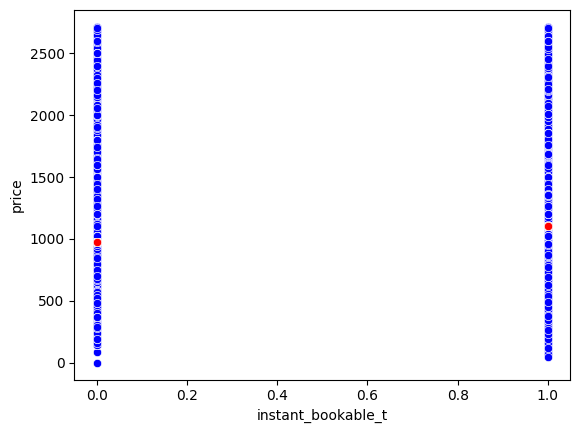

In [73]:
sns.scatterplot(x='instant_bookable_t',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='instant_bookable_t',y='y_pred_bookable',color='red',data=df_encoded)

In [88]:
r2 = r2_score(dfM['price'], y_pred_bookable)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0163


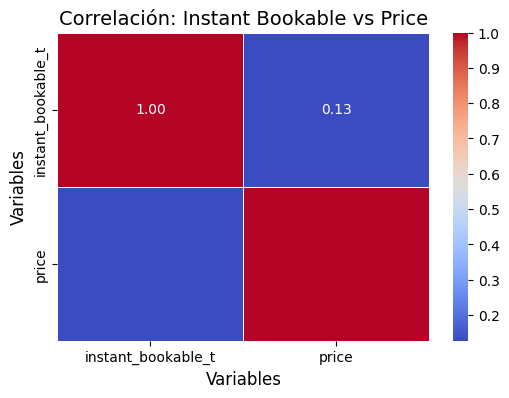

In [103]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['instant_bookable_t', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Instant Bookable vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()

PRICE VS PROPERTY_TYPE

<Axes: xlabel='property_type_Shipping container', ylabel='price'>

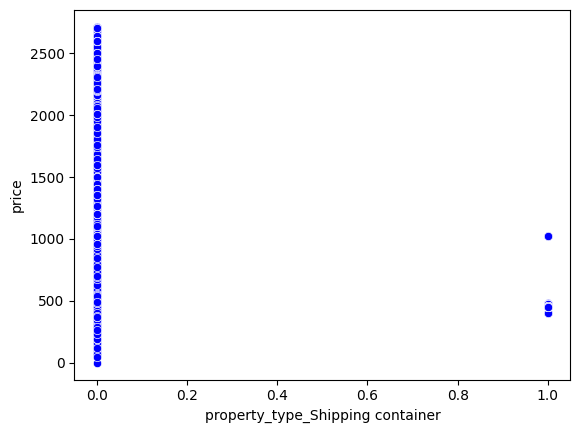

In [74]:
sns.scatterplot(x='property_type_Shipping container',y='price',color='blue',data=df_encoded)

In [75]:
Vars_Indep=df_encoded[['property_type_Shipping container']]
Vars_Dep=df_encoded['price']

In [76]:
model_property=LinearRegression()

In [77]:
type(model_property)

sklearn.linear_model._base.LinearRegression

In [78]:
model_property.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [79]:
model_property.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_Shipping container'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-549.08957898]),
 'rank_': 1,
 'singular_': array([8.23565709]),
 'intercept_': 1027.7057554499509}

In [80]:
y_pred_property=model_property.predict(X=df_encoded[['property_type_Shipping container']])
y_pred_property

array([1027.70575545, 1027.70575545, 1027.70575545, ..., 1027.70575545,
       1027.70575545, 1027.70575545])

In [81]:
df_encoded.insert(0,'y_pred_property',y_pred_property)
df_encoded

,y_pred_property,y_pred_bookable,y_pred_verified,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,...,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,1027.705755,973.390243,1028.410151,1012.627602,2.317483,988.676428,1024.893880,25/09/2024,city scrape,Villa Dante,...,False,False,False,False,False,False,False,True,True,False
1,1027.705755,973.390243,1028.410151,972.493179,2.926435,1091.497389,1037.755212,26/09/2024,previous scrape,Condesa Haus,...,False,False,False,False,False,False,True,True,True,False
2,1027.705755,973.390243,1028.410151,992.560391,3.839863,1091.497389,922.003228,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa",...,False,False,False,False,False,False,True,True,True,False
3,1027.705755,973.390243,1028.410151,1076.842679,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,...,False,False,False,False,False,False,True,True,True,False
4,1027.705755,973.390243,1028.410151,1092.896449,2.317483,1091.497389,1060.262542,25/09/2024,city scrape,NEW DESIGNER LOFT,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1027.705755,1107.314911,1028.410151,1012.627602,3.839863,1091.497389,1060.262542,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,...,False,False,False,False,True,False,True,True,True,True
26578,1027.705755,1107.314911,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,...,False,False,False,False,True,False,False,True,True,True
26579,1027.705755,1107.314911,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite King | District Polanco,...,False,False,False,False,True,False,False,True,True,True
26580,1027.705755,1107.314911,1028.410151,1012.627602,2.317483,988.676428,1060.262542,25/09/2024,city scrape,Suite Queen | District Polanco,...,False,False,False,False,True,False,False,True,True,True


<Axes: xlabel='property_type_Shipping container', ylabel='price'>

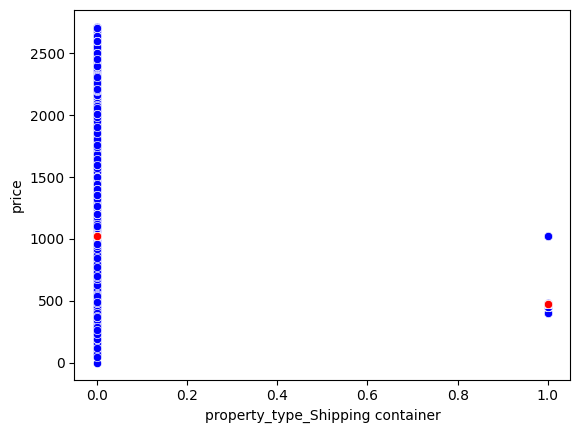

In [82]:
sns.scatterplot(x='property_type_Shipping container',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='property_type_Shipping container',y='y_pred_property',color='red',data=df_encoded)

In [89]:
r2 = r2_score(dfM['price'], y_pred_property)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0029


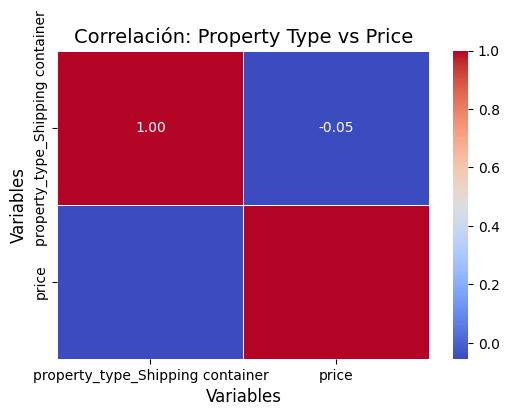

In [104]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['property_type_Shipping container', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Property Type vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


MODELO MATEMATICO POR TIPO DE CUARTO 

In [90]:
# Crear un diccionario para almacenar resultados
resultados = {}

# Tipos de alojamiento
tipos_alojamiento = dfM["room_type"].unique()

# Iterar sobre cada tipo de alojamiento
for tipo in tipos_alojamiento:
    df_tipo = dfM[dfM["room_type"] == tipo].select_dtypes(include=['number'])  # Solo columnas numéricas
    
    # Matriz de correlaciones
    corr_matrix = df_tipo.corr()
    
    # Encontrar la variable con mayor correlación absoluta con 'price'
    corr_price = corr_matrix["price"].drop("price", errors="ignore").abs()
    if corr_price.empty:
        continue
    
    max_corr_var = corr_price.idxmax()  # Variable con mayor correlación
    max_corr_val = corr_price.max()     # Valor del coeficiente de Pearson
    
    # Guardar resultados
    resultados[tipo] = {"Variable más correlacionada": max_corr_var, "Coef. Pearson": max_corr_val}

# Convertir a DataFrame para visualizar
df_resultados = pd.DataFrame(resultados).T
df_resultados


,Variable más correlacionada,Coef. Pearson
Entire home/apt,bathrooms,0.33046
Private room,accommodates,0.29448
Hotel room,bedrooms,0.297625
Shared room,host_listings_count,0.318378


POR CADA TIPO DE PROPIEDAD COEFICIENTES DE DETERMINACION Y CORRELACION

In [ ]:
# Agregar coeficiente de determinación R² al DataFrame
for tipo in resultados:
    variable = resultados[tipo]["Variable más correlacionada"]
    df_tipo = dfM[dfM["room_type"] == tipo].dropna(subset=["price", variable])  # Filtrar valores NaN
    
    X = df_tipo[[variable]]
    y = df_tipo["price"]
    
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    r2 = modelo.score(X, y)
    
    # Guardar el coeficiente de determinación R²
    resultados[tipo]["R²"] = r2

# Actualizar DataFrame de resultados
df_resultados = pd.DataFrame(resultados).T
df_resultados

,Variable más correlacionada,Coef. Pearson,R²
Entire home/apt,bathrooms,0.33046,0.109204
Private room,accommodates,0.29448,0.086718
Hotel room,bedrooms,0.297625,0.088581
Shared room,host_listings_count,0.318378,0.101365


Tabla de coeficientes de mayor correlacion 

In [92]:
# Convertir todas las columnas posibles a numéricas
df_numeric = df_encoded.apply(pd.to_numeric, errors='coerce')

# Calcular la correlación con 'price'
correlaciones = df_numeric.corr()['price'].dropna().drop('price')

# Crear DataFrame con los resultados
tabla_correlaciones = pd.DataFrame({
    'Variable': correlaciones.index,
    'Correlación': correlaciones.values
})

# Ordenar de mayor a menor (en valor absoluto)
tabla_correlaciones['Correlación Abs'] = tabla_correlaciones['Correlación'].abs()
tabla_correlaciones = tabla_correlaciones.sort_values(by='Correlación Abs', ascending=False).drop(columns=['Correlación Abs'])

# Mostrar la tabla ordenada
print(tabla_correlaciones)


                                       Variable  Correlación
126                      room_type_Private room    -0.409248
11                                 accommodates     0.406732
13                                     bedrooms     0.347221
4                               y_pred_bedrooms     0.347221
52             property_type_Entire rental unit     0.300873
..                                          ...          ...
79      property_type_Private room in houseboat    -0.000326
74          property_type_Private room in floor    -0.000326
72   property_type_Private room in earthen home    -0.000326
108           property_type_Shared room in dorm    -0.000326
57                      property_type_Farm stay    -0.000231

[132 rows x 2 columns]


MEJOR MODELO DE CORRELACION 

In [93]:
# Seleccionar las variables cuantitativas
columnas_cuantitativas = [
     'host_acceptance_rate', 'host_is_superhost_1', 'host_total_listings_count',
    'accommodates', 'bedrooms', 'review_scores_value', 'reviews_per_month'
]

# Eliminar filas con valores nulos en las columnas seleccionadas
df_cuant = df_encoded[columnas_cuantitativas + ['price']].dropna()

# Separar variable dependiente (y) e independientes (X)
X = df_cuant[columnas_cuantitativas]
y = df_cuant['price']

# Dividir datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal múltiple
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predicciones
y_pred = model_multi.predict(X_test)

# Calcular R² del modelo
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R²) del modelo: {r2}')

# Crear DataFrame con los coeficientes obtenidos
coeficientes_multi = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model_multi.coef_
})

# Mostrar coeficientes ordenados por magnitud
coeficientes_multi = coeficientes_multi.sort_values(by='Coeficiente', ascending=False)
print(coeficientes_multi)

Coeficiente de Determinación (R²) del modelo: 0.17357318506672093
                    Variable  Coeficiente
0       host_acceptance_rate   197.132890
4                   bedrooms   118.376900
3               accommodates   107.297081
5        review_scores_value    64.199828
1        host_is_superhost_1    34.247831
2  host_total_listings_count     3.961931
6          reviews_per_month   -10.910311


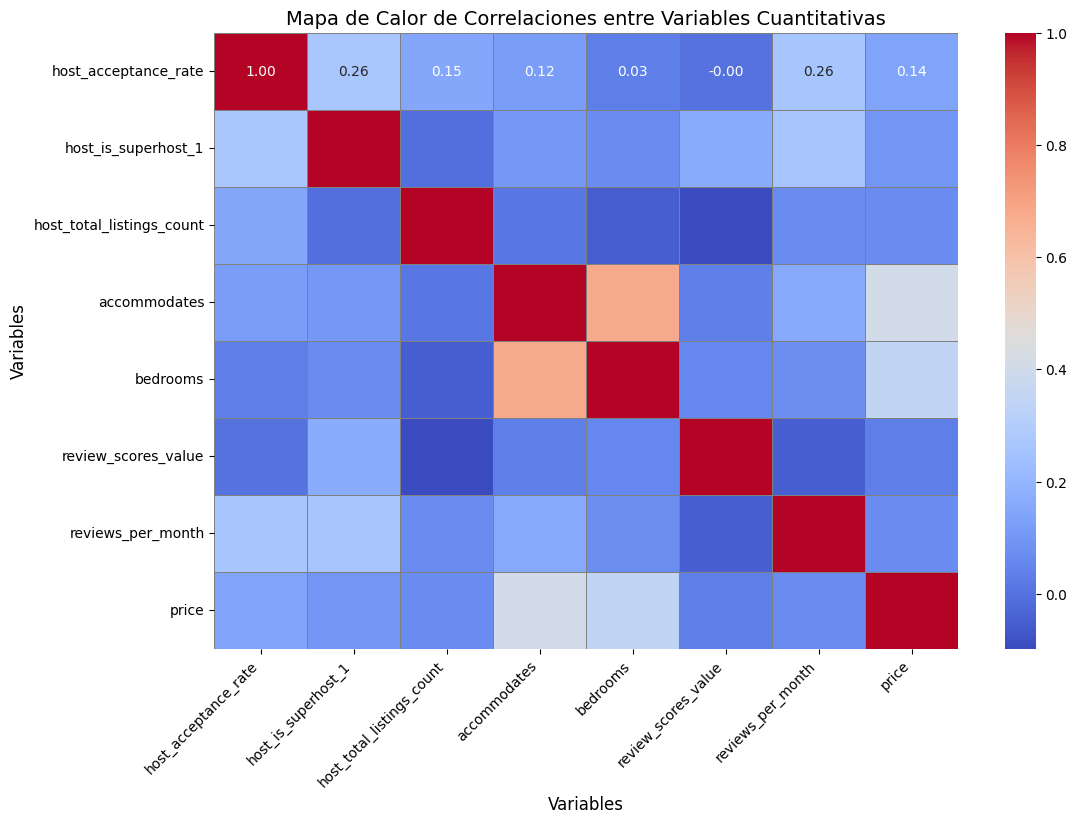

In [96]:
# Calcular matriz de correlación
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df_cuant.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    annot_kws={"size": 10},  # Ajustar tamaño de los números dentro del gráfico
    linewidths=0.5,  # Separación entre celdas
    linecolor="gray"  # Color de líneas de separación
)

# Agregar etiquetas y título
plt.title("Mapa de Calor de Correlaciones entre Variables Cuantitativas", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Rotar etiquetas en los ejes para mejor legibilidad
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar el gráfico
plt.show()